# Credit EDA

In [196]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Reading dataset from local

df=pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [55]:
# Checking the shape of the data 
df.shape

(307511, 122)

In [56]:
# Cleaning the data 
# Checking the null value 

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [57]:
empty_col = df.isnull().sum()
empty_col = empty_col[empty_col. values > (0.3* len(empty_col))]
len(empty_col)

64

There are 64 columns having vull values more than 30%. 

In [58]:
# Removing 64 columns null value columns. 
empty_col = list(empty_col[empty_col.values>=0.3*len(empty_col)].index)
df.drop(labels=empty_col, axis=1, inplace=True)
print(len(empty_col))

64


In [59]:
# Checking the null values with less percentage
df.isnull().sum() / len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [60]:
# Checking the outlier
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

So "AMT_ANNUITY" column is having very few null values rows. We can however try to impute the missing values.


Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, 
Hence Median comes to rescue for this and we will fill those missing banks with median value

In [61]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [62]:
# Searching the column for missing values 

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now, all columns have been with 0 null values. 

In [63]:
# Removing rows having null values greater than or equal to 30%

empty_row=df.isnull().sum(axis=1)
empty_row=list(empty_row[empty_row.values>=0.3*len(df)].index)
df.drop(labels=empty_row,axis=0,inplace=True)
print(len(empty_row))

0


In [64]:
# We will remove unwanted columns from this dataset

unwanted_cols =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted_cols,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [65]:
# let's check these categorical columns having these 'XNA' values
    
# For Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [66]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

So, there are 4 rows from Gender column and 55374 rows from Organization type column.

In [67]:
# Describing the gender column to check the female and male counts
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We have females in majority and only 4 rows are having NA, we can update the NA with Female, however it will not impact the data.

In [68]:
# Updating the column 'CODE_GENDER' with F for the dataset

df.loc[df['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [69]:
# Describing the 'ORGANIZATION_TYPE' column
df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', if we drop the rows of total 55374, will not have any major impact on our dataset.
Because it is only 18% of the total count.

In [70]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [71]:
# Casting all the variable into numeric in the data set 

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

### Derived Metrics


Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [72]:
# we create Bins for income amount  

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [73]:
# now we create bins for credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

Now we divide the dataset into 2 dataset of target =1 for applicants who has difficulties in paying and target =0 for rest of all.

In [74]:
target_0= df.loc[df['TARGET']==0]
target_1= df.loc[df['TARGET']==1]


Now we will calculate the percentage bcz we have an imbalance in the data, and majority we have is target 0.

In [75]:
# calculating the percentage
round(len(target_0) / len(target_1), 2)

10.55

Imbalance ratio is 10.55

#### Univariate Analysis for Categories


##### Now doing categorical univariate analysis in logarithmic scale for target_0 

In [76]:
# Count plotting in logarithmic scale

def univariate_plot(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='inferno') 
        
    plt.show()

In [78]:
# plotting for income 
univariate_plot(target_0, col= 'AMT_INCOME_RANGE', title= 'Income Range', hue='CODE_GENDER')

Notable Findings


- In 10 sections, female counts surpass those of males, although there exist instances where males have higher counts, with one section having equal counts for both genders.

- The range of income between 100k and 200k exhibits a higher prevalence of credited instances.

- Within this income range, females predominantly receive credits.

- Instances of income exceeding 400k are notably scarce.





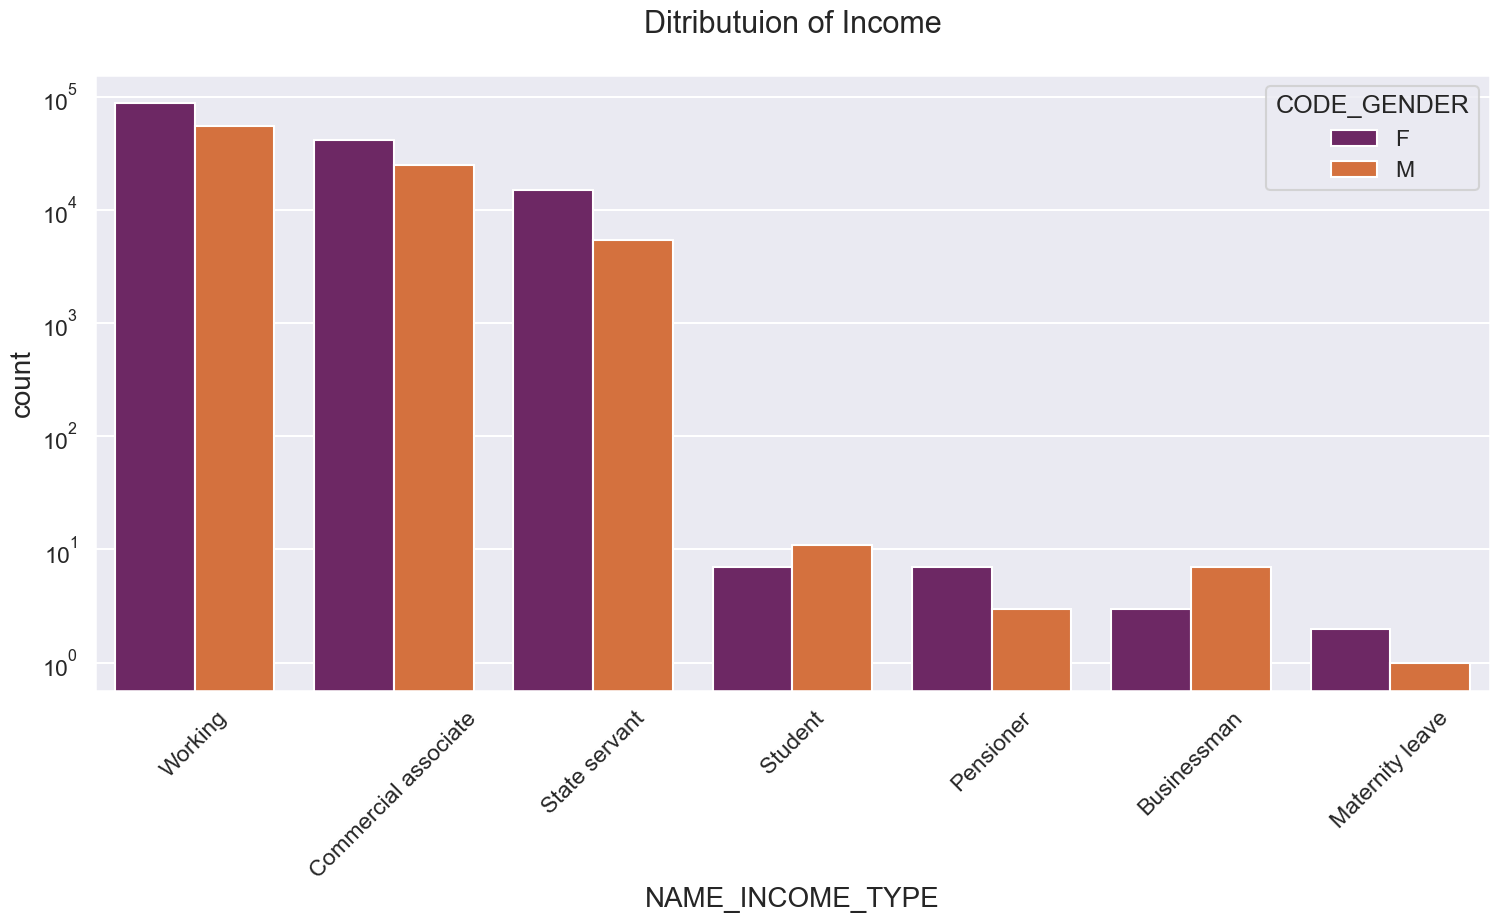

In [79]:
# Plotting for income types

univariate_plot(target_0, col='NAME_INCOME_TYPE', title='Ditributuion of Income', hue='CODE_GENDER')

Key Takeaways from the Graph:

- Among income types such as 'working', 'commercial associate', and 'State Servant', the count of credits is notably higher compared to 'Maternity leave'.
- Additionally, females have a greater count of credits than males in these income types.
- Conversely, 'Maternity leave' exhibits a lower number of credits.

- Notably, income types like 'student', 'pensioner', and 'Businessman' (type 1) do not have any instances of late payments, indicating a lack of occurrences in this conte

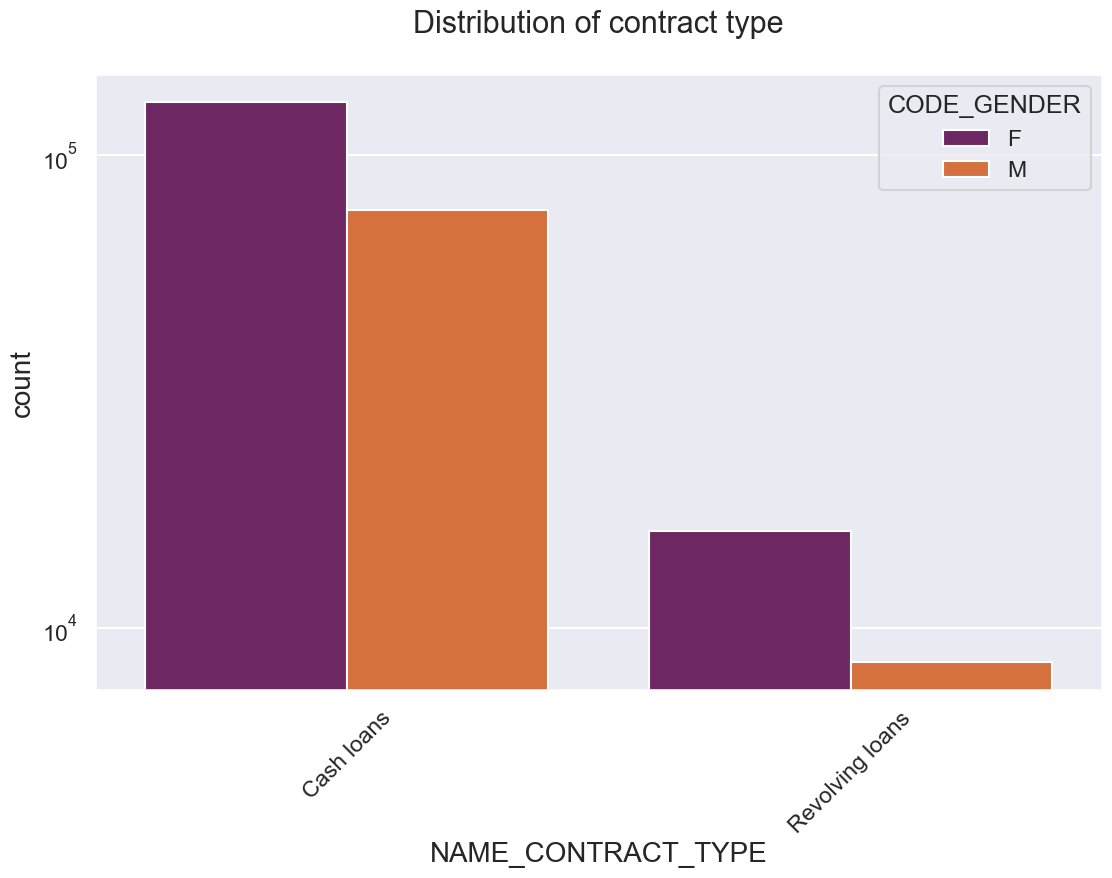

In [132]:
# Plotting for contract type

univariate_plot(target_0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Key takeaways from the provided graph:

- The number of credits is notably higher for the 'cash loans' contract type compared to the 'Revolving loans' contract type.
- Similarly, in this context, female applicants demonstrate a higher tendency to apply for credits.



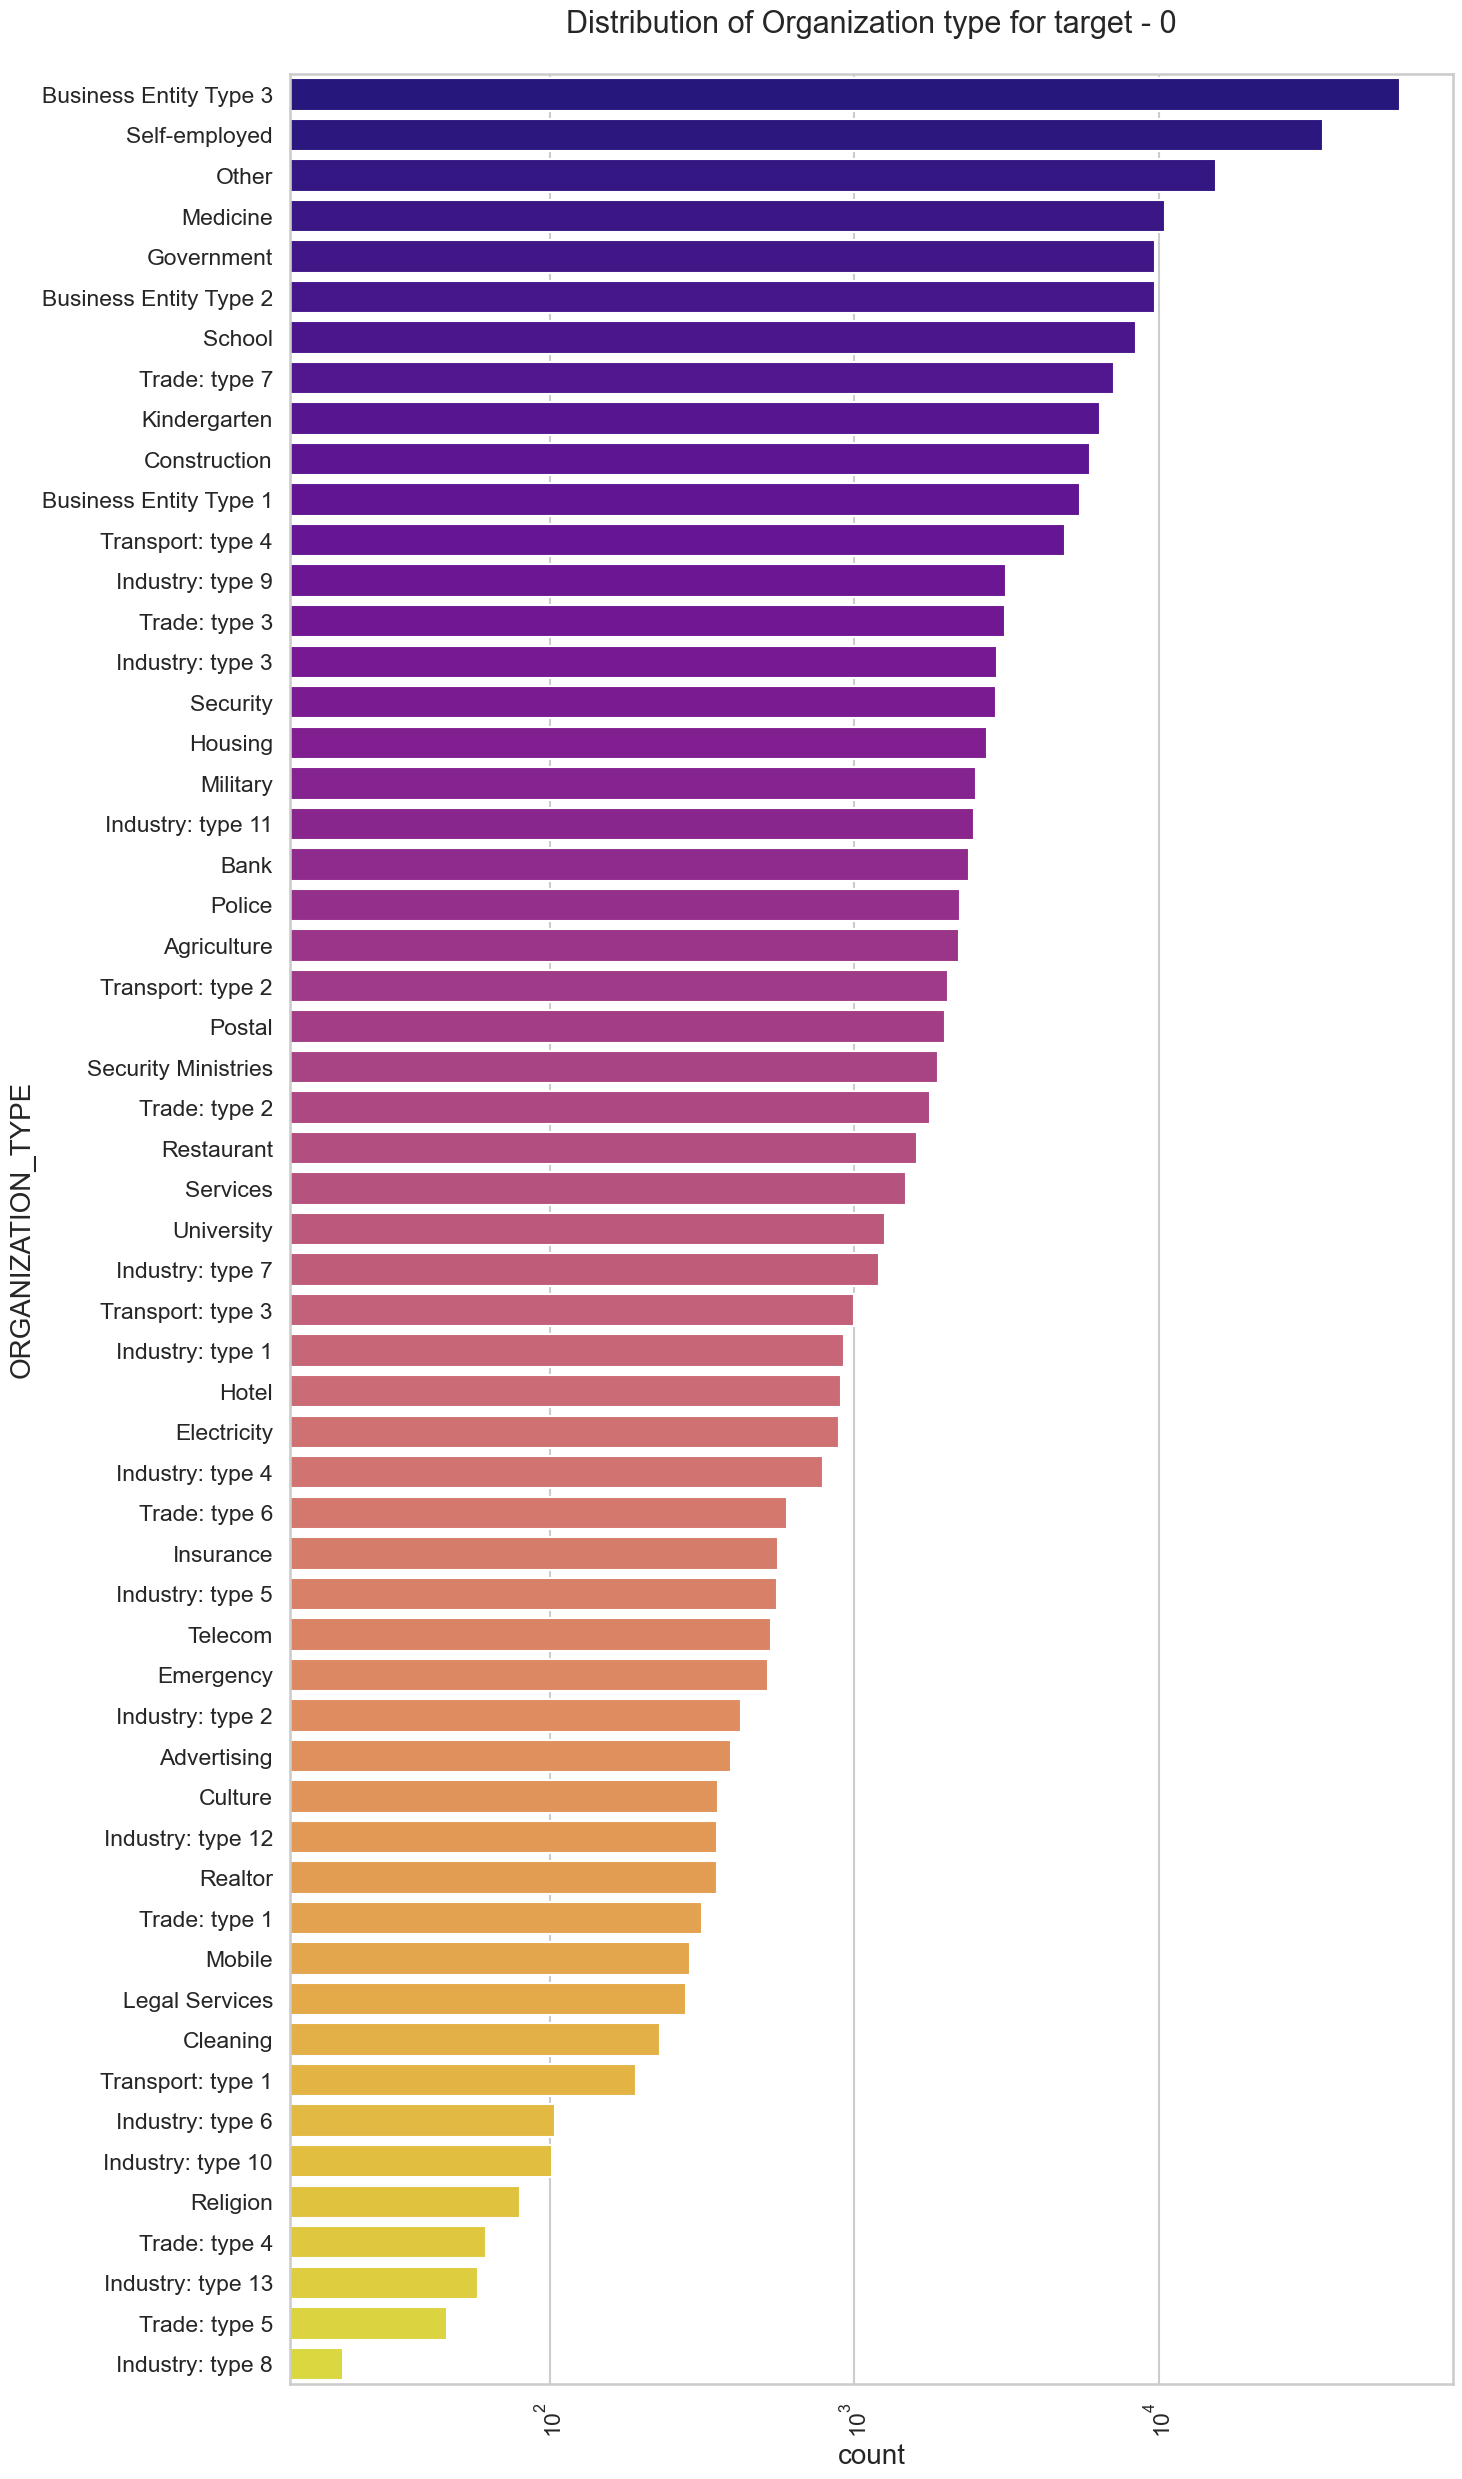

In [192]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='plasma')

plt.show()

Key observations from the depicted graph:

- Credit applicants primarily belong to diverse organization types, notably including 'Business entity Type 3', 'Self employed', 'Other', 'Medicine', and 'Government'.
- There is a lower representation of clients originating from Industry types 8, 6, and 10, as well as specific categories such as religion and trade type 5 and 4.





**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

In [135]:
# PLotting for income range

univariate_plot(target_1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Key takeaways from the presented graph:

- Male population surpasses the count of females.
- The credit count is notably higher within the income range of 100000 to 200000.
- This visualization underscores the predominance of males in securing credits within this income bracket.
- There is a minimal occurrence of instances within the income range of 400000 and above.





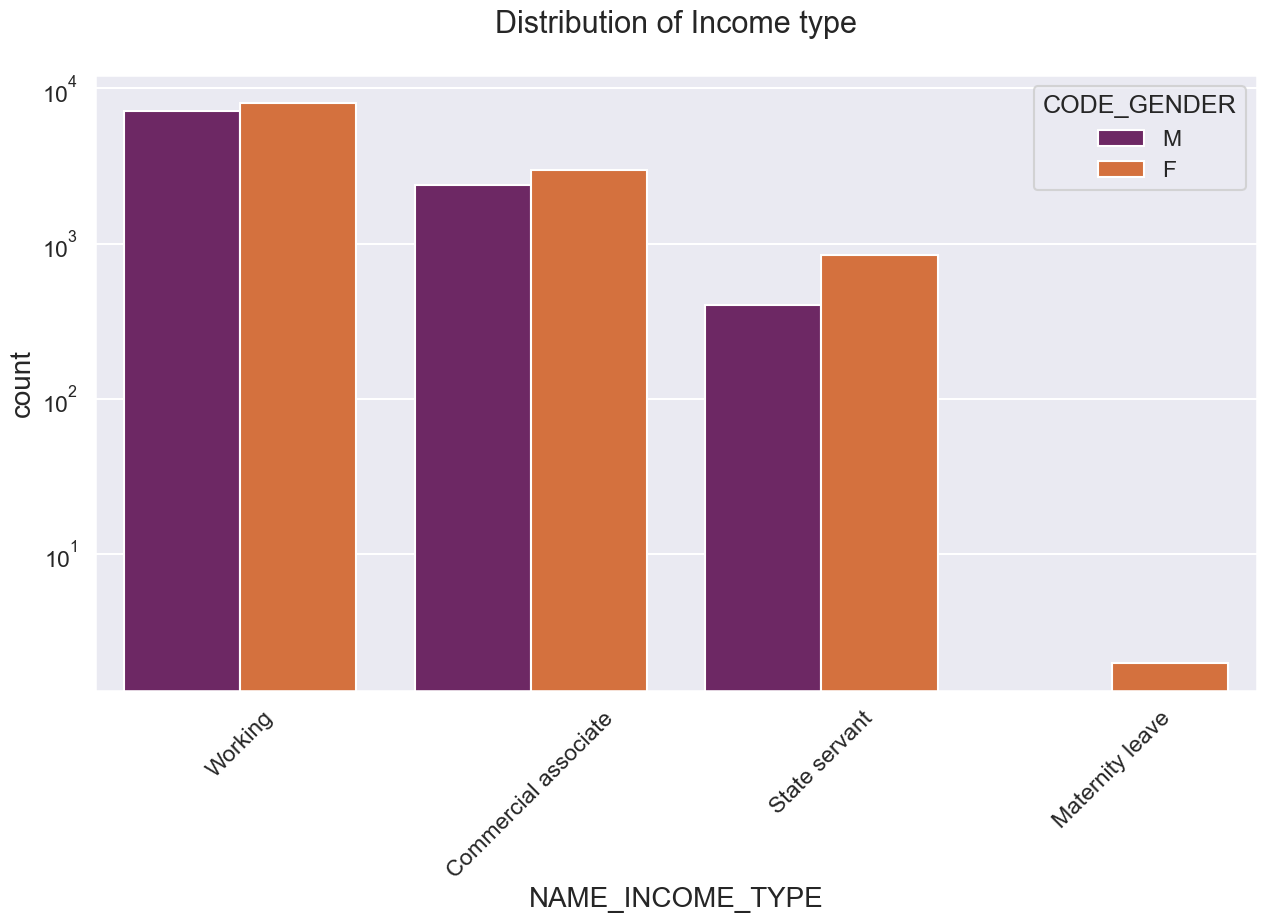

In [136]:
# Plotting for Income type

univariate_plot(target_1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Key insights drawn from the depicted graph:

- The prevalence of credits is notably higher for income types labeled as 'working', 'commercial associate', and 'State Servant' compared to other categories like 'Maternity leave'.
- Within this context, females exhibit a higher credit count compared to males.
- A limited number of credits are associated with the 'Maternity leave' income type.
- Notably, for income type '1', there are no instances of 'student', 'pensioner', or 'Businessman', implying their absence in delayed payments.

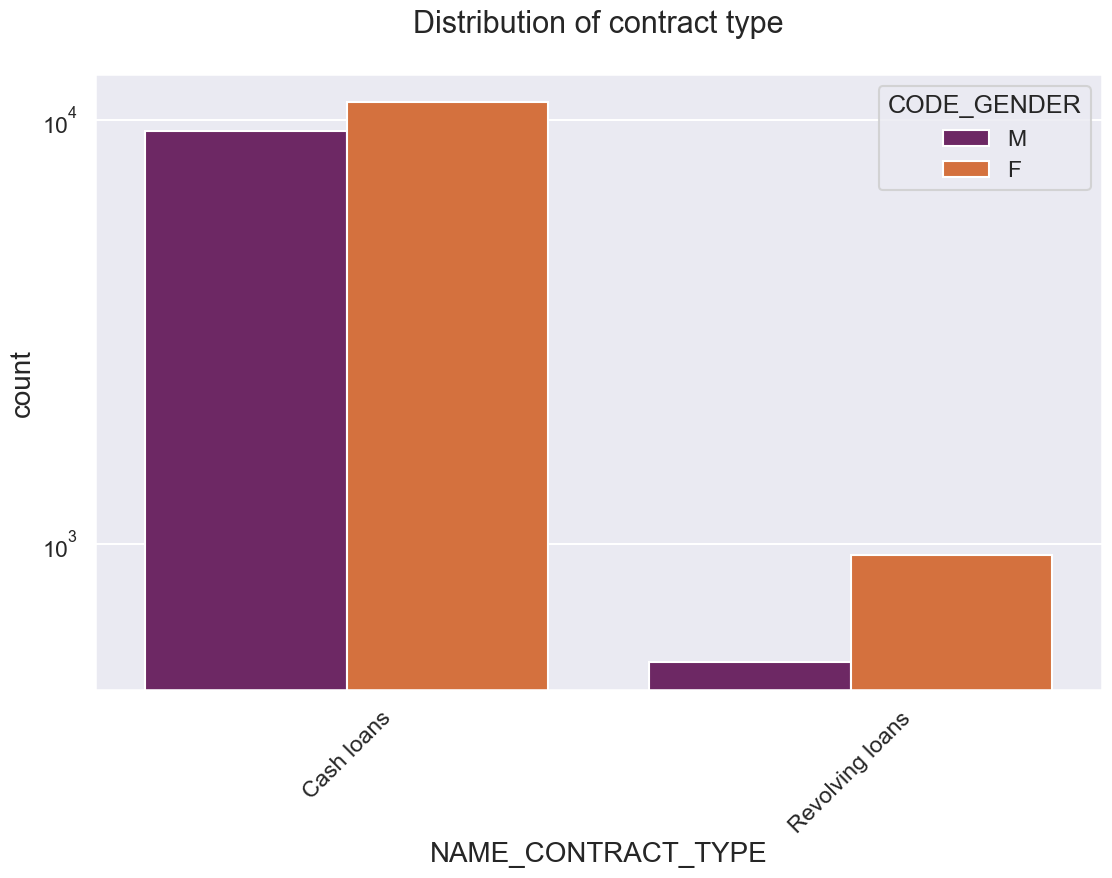

In [138]:
# Plotting for Contract type

univariate_plot(target_1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

In [195]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='inferno')

plt.show()

Key observations extracted from the provided graph:

- Credit applicants predominantly originate from a diverse set of organization types, notably including 'Business entity Type 3', 'Self employed', 'Other', 'Medicine', and 'Government'.
- In contrast, there is a lower representation of clients hailing from Industry types 8, 6, and 10, as well as specific categories such as religion and trade type 5 and 4.
- Similar patterns in the distribution of organization types are discernible for type 0.





In [141]:
# Finding some correlation for numerical columns for target 1 and 0  
target0_corr=target_0.iloc[0:,2:]
target1_corr=target_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


/var/folders/9v/r57g88ws1qs3dj169qc7g4k80000gn/T/ipykernel_12641/1016724531.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target0=target0_corr.corr(method='spearman')
/var/folders/9v/r57g88ws1qs3dj169qc7g4k80000gn/T/ipykernel_12641/1016724531.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target1=target1_corr.corr(method='spearman')


In [142]:
# correlation target 0 
target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                   -0.010795                   -0.030579   
AMT_INCOME_TOTAL                0.472204                    0.110074   
AMT_CREDIT                      0.826689                    0.060706   
AMT_ANNUITY                     1.000000                    0.064328   
REGION_POPULATION_RELATIVE      0.064328                    1.000000   
DAYS_BIRTH                     -0.100287                   -0.041663   
DAYS_EMPLOYED                  -0.074643                    0.000900   
DAYS_REGISTRATION               0.010712                   -0.042400   
DAYS_ID_PUBLISH                -0.027354                   -0.010299   
HOUR_APPR_PROCESS_START         0.032953                    0.133213   
REG_REGION_NOT_LIVE_REGION      0.033435                   -0.025292   
REG_REGION_NOT_WORK_REGION      0.070841                    0.032446   
LIVE_REGION_NOT_WORK_REGION     0.069051                    0.056814   
REG_CITY_NOT_LIVE_CITY         -0.019954                   -0.049779   
REG_CITY_NOT_WORK_CITY         -0.024085                   -0.034808   
LIVE_CITY_NOT_WORK_CITY        -0.008087                   -0.007332   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.266534       0.030948           0.155518   
AMT_INCOME_TOTAL              -0.054666      -0.060868           0.040559   
AMT_CREDIT                    -0.169030      -0.104251          -0.015318   
AMT_ANNUITY                   -0.100287      -0.074643           0.010712   
REGION_POPULATION_RELATIVE    -0.041663       0.000900          -0.042400   
DAYS_BIRTH                     1.000000       0.307787           0.265449   
DAYS_EMPLOYED                  0.307787       1.000000           0.126708   
DAYS_REGISTRATION              0.265449       0.126708           1.000000   
DAYS_ID_PUBLISH                0.083331       0.106823           0.036788   
HOUR_APPR_PROCESS_START        0.051299       0.026444          -0.029553   
REG_REGION_NOT_LIVE_REGION     0.058627       0.065435           0.017715   
REG_REGION_NOT_WORK_REGION     0.038104       0.086966           0.015092   
LIVE_REGION_NOT_WORK_REGION    0.012789       0.063533           0.007716   
REG_CITY_NOT_LIVE_CITY         0.167477       0.118224           0.038064   
REG_CITY_NOT_WORK_CITY         0.111539       0.125954           0.047339   
LIVE_CITY_NOT_WORK_CITY        0.029007       0.069567           0.027231   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.119164                -0.030162   
AMT_INCOME_TOTAL                   -0.036702                 0.073503   

In [143]:
# correlation target 1
target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.015133                   -0.029682   
AMT_INCOME_TOTAL                0.428947                    0.058005   
AMT_CREDIT                      0.812093                    0.043545   
AMT_ANNUITY                     1.000000                    0.028666   
REGION_POPULATION_RELATIVE      0.028666                    1.000000   
DAYS_BIRTH                     -0.100200                   -0.044444   
DAYS_EMPLOYED                  -0.060193                   -0.015246   
DAYS_REGISTRATION               0.019762                   -0.033490   
DAYS_ID_PUBLISH                -0.044128                   -0.017779   
HOUR_APPR_PROCESS_START         0.021129                    0.109400   
REG_REGION_NOT_LIVE_REGION      0.029646                   -0.032702   
REG_REGION_NOT_WORK_REGION      0.060363                   -0.008160   
LIVE_REGION_NOT_WORK_REGION     0.059724                    0.012602   
REG_CITY_NOT_LIVE_CITY         -0.011744                   -0.057239   
REG_CITY_NOT_WORK_CITY         -0.015938                   -0.044761   
LIVE_CITY_NOT_WORK_CITY        -0.003012                   -0.014753   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.175025       0.006823           0.110854   
AMT_INCOME_TOTAL              -0.103026      -0.053798           0.011378   
AMT_CREDIT                    -0.200718      -0.107605          -0.021973   
AMT_ANNUITY                   -0.100200      -0.060193           0.019762   
REGION_POPULATION_RELATIVE    -0.044444      -0.015246          -0.033490   
DAYS_BIRTH                     1.000000       0.256870           0.192350   
DAYS_EMPLOYED                  0.256870       1.000000           0.086286   
DAYS_REGISTRATION              0.192350       0.086286           1.000000   
DAYS_ID_PUBLISH                0.146246       0.104244           0.061563   
HOUR_APPR_PROCESS_START        0.041994       0.010328          -0.044753   
REG_REGION_NOT_LIVE_REGION     0.046320       0.069566           0.006362   
REG_REGION_NOT_WORK_REGION     0.022208       0.082264           0.000896   
LIVE_REGION_NOT_WORK_REGION    0.000356       0.056081          -0.001416   
REG_CITY_NOT_LIVE_CITY         0.145884       0.118869           0.015831   
REG_CITY_NOT_WORK_CITY         0.096181       0.139863           0.039204   
LIVE_CITY_NOT_WORK_CITY        0.009633       0.069316           0.026105   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.091042                -0.040338   
AMT_INCOME_TOTAL                   -0.051113                 0.078779   

In [144]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()



In [145]:
# Heatmap for target 0 
targets_corr(data= target0, title='Correlation for target 0')

Analyzing the correlation heatmap above, we can deduce several noteworthy observations:

- There exists an inverse relationship between credit amount and the client's age, implying that lower age is associated with higher credit amounts and vice versa.
- Credit amount demonstrates an inverse correlation with the number of children a client has, suggesting that clients with fewer children tend to have higher credit amounts, and vice versa.
- The income amount showcases an inverse correlation with the number of children a client has; clients with fewer children tend to have higher income, and vice versa.
- Densely populated areas seem to have fewer clients with children.
- Higher credit amounts are linked with densely populated areas.
- Densely populated areas exhibit higher income levels as well.

In [146]:
# Target 1 

targets_corr(data= target1, title='Correlation  for target 1')

The correlation heatmap for Target 1 reveals similar patterns to Target 0, but with a few distinct observations:

- Clients whose permanent address does not match the contact address tend to have fewer children, and the reverse is also true.
- Clients whose permanent address does not match the work address also tend to have fewer children, and the converse holds as well.

### Univariate Analysis for Variables

In [153]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 15
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target_1, x=col,orient='v')
    plt.show()
    
    

#### For target 0 - Finding any outliers

In [154]:
univariate_numerical(data=target_0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


In [155]:
# Distribution of credit amount
univariate_numerical(data=target_0,col='AMT_CREDIT',title='Distribution of credit amount')

/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


In [152]:
# Distribution of anuuity amount

univariate_numerical(data=target_0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


**For Target 1 - Finding any outliers**

In [156]:
# Distribution of income amount

univariate_numerical(data=target_1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


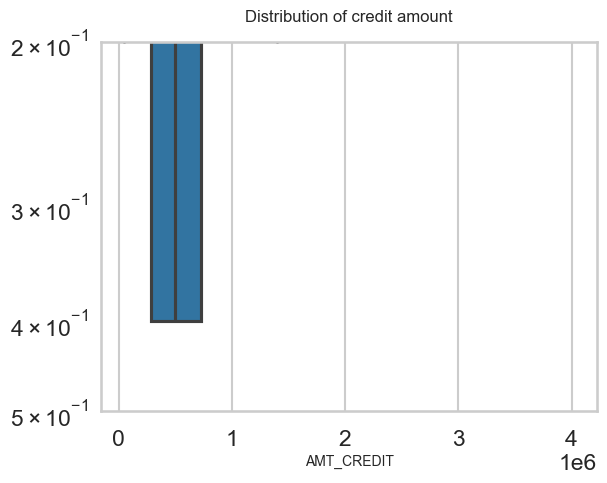

In [158]:
# Distribution of credit amount

univariate_numerical(data=target_1,col='AMT_CREDIT',title='Distribution of credit amount')

/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/aasimvelani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


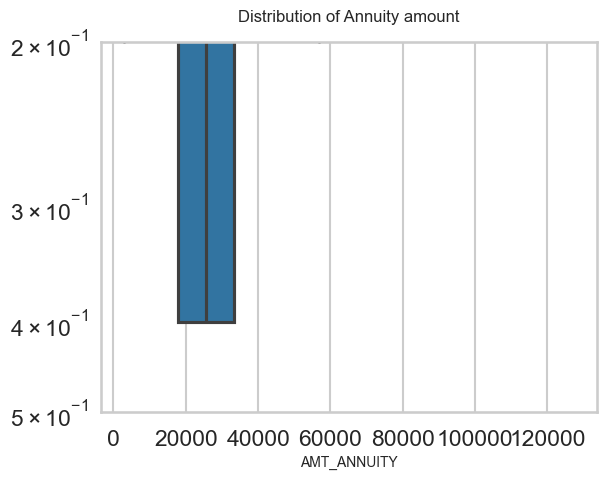

In [159]:
# Distribution of Annuity amount

univariate_numerical(data=target_1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

**Bivariate analysis for numerical variables**

**For Target 0**

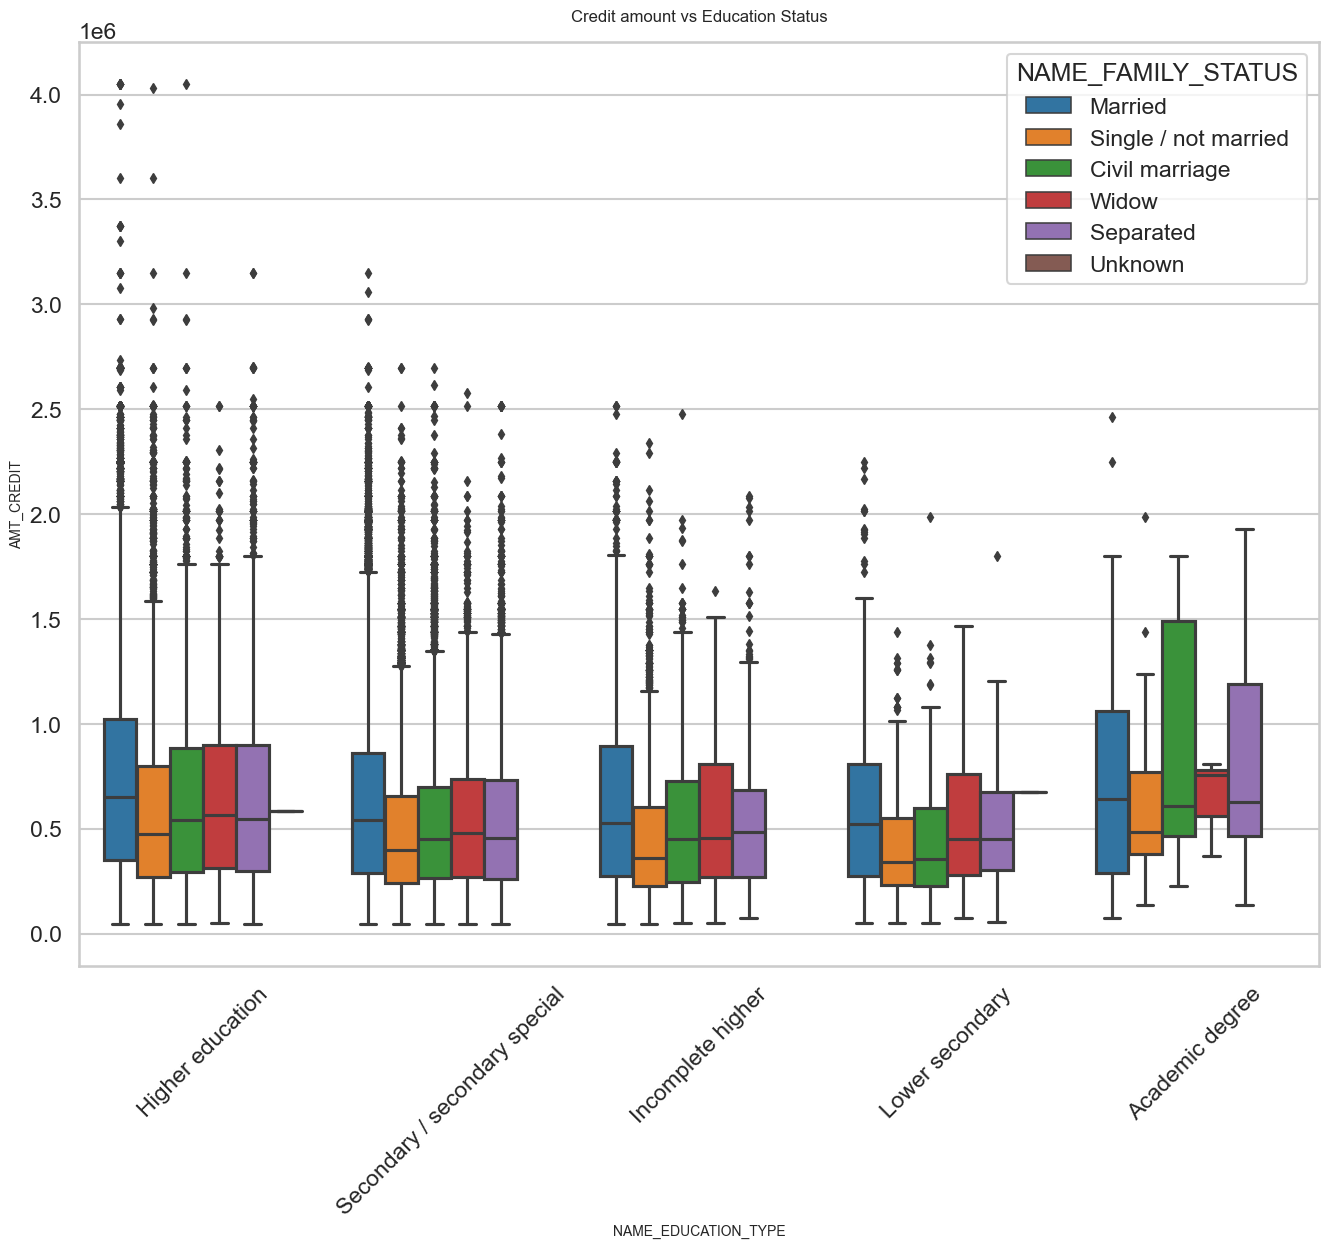

In [160]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

- Among the various family statuses, individuals with 'civil marriage', 'marriage', and 'separated' tend to have a higher frequency of credits when possessing an Academic degree education.
- Notably, the 'marriage', 'single', and 'civil marriage' family statuses with higher education levels exhibit a greater number of outliers.
- In the case of 'Academic degree' education, 'civil marriage' emerges as the dominant category, predominantly situated within the third quartile in terms of credit distribution.

In [161]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Analyzing the depicted boxplot for 'Higher education', it's evident that income amounts are predominantly comparable across various family statuses. While 'Academic degree' shows fewer outliers, its income levels are slightly higher than those for 'Higher education'.

Within the context of 'civil marriage' family status and 'Lower secondary' education, the income amount tends to be lower compared to other situations.






**For Target 1**

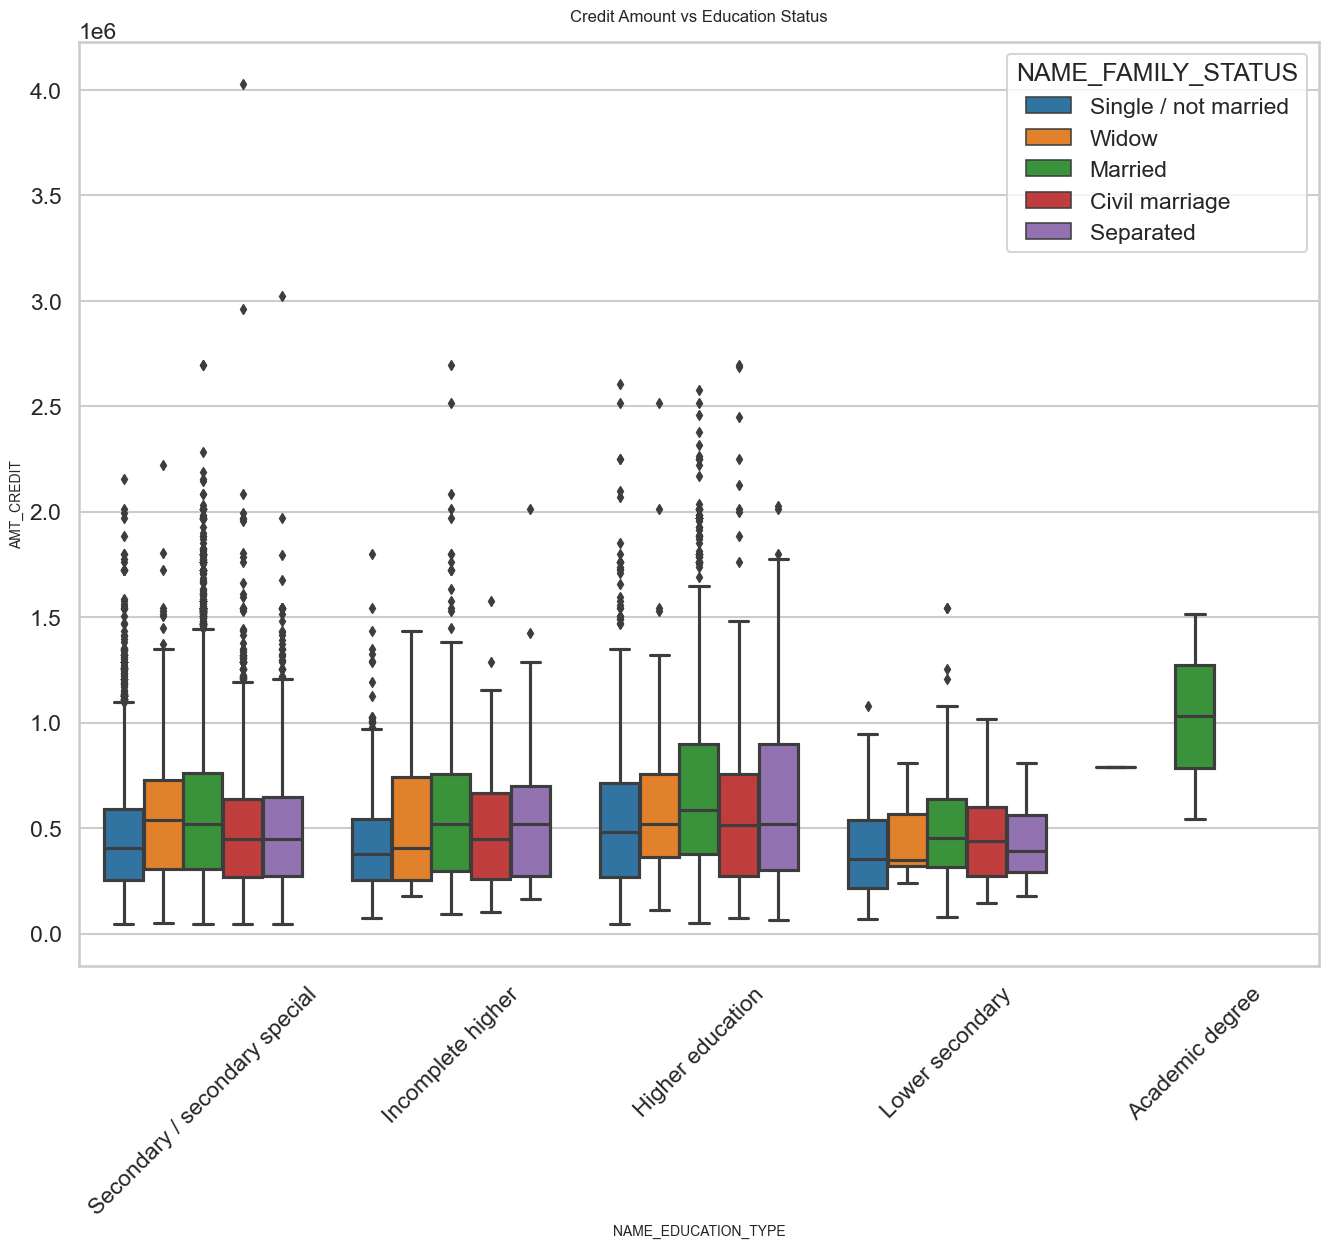

In [162]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Closely resembling Target 0, the observed box plot reveals notable trends:

- Family statuses such as 'civil marriage', 'marriage', and 'separated', coupled with an Academic degree education, exhibit a greater propensity for higher credit counts compared to other cases.
- A substantial portion of outliers is apparent within 'Higher education' and 'Secondary' education categories.
- For 'Academic degree' education and 'civil marriage' family status, the third quartile predominantly encompasses the bulk of credit instances.

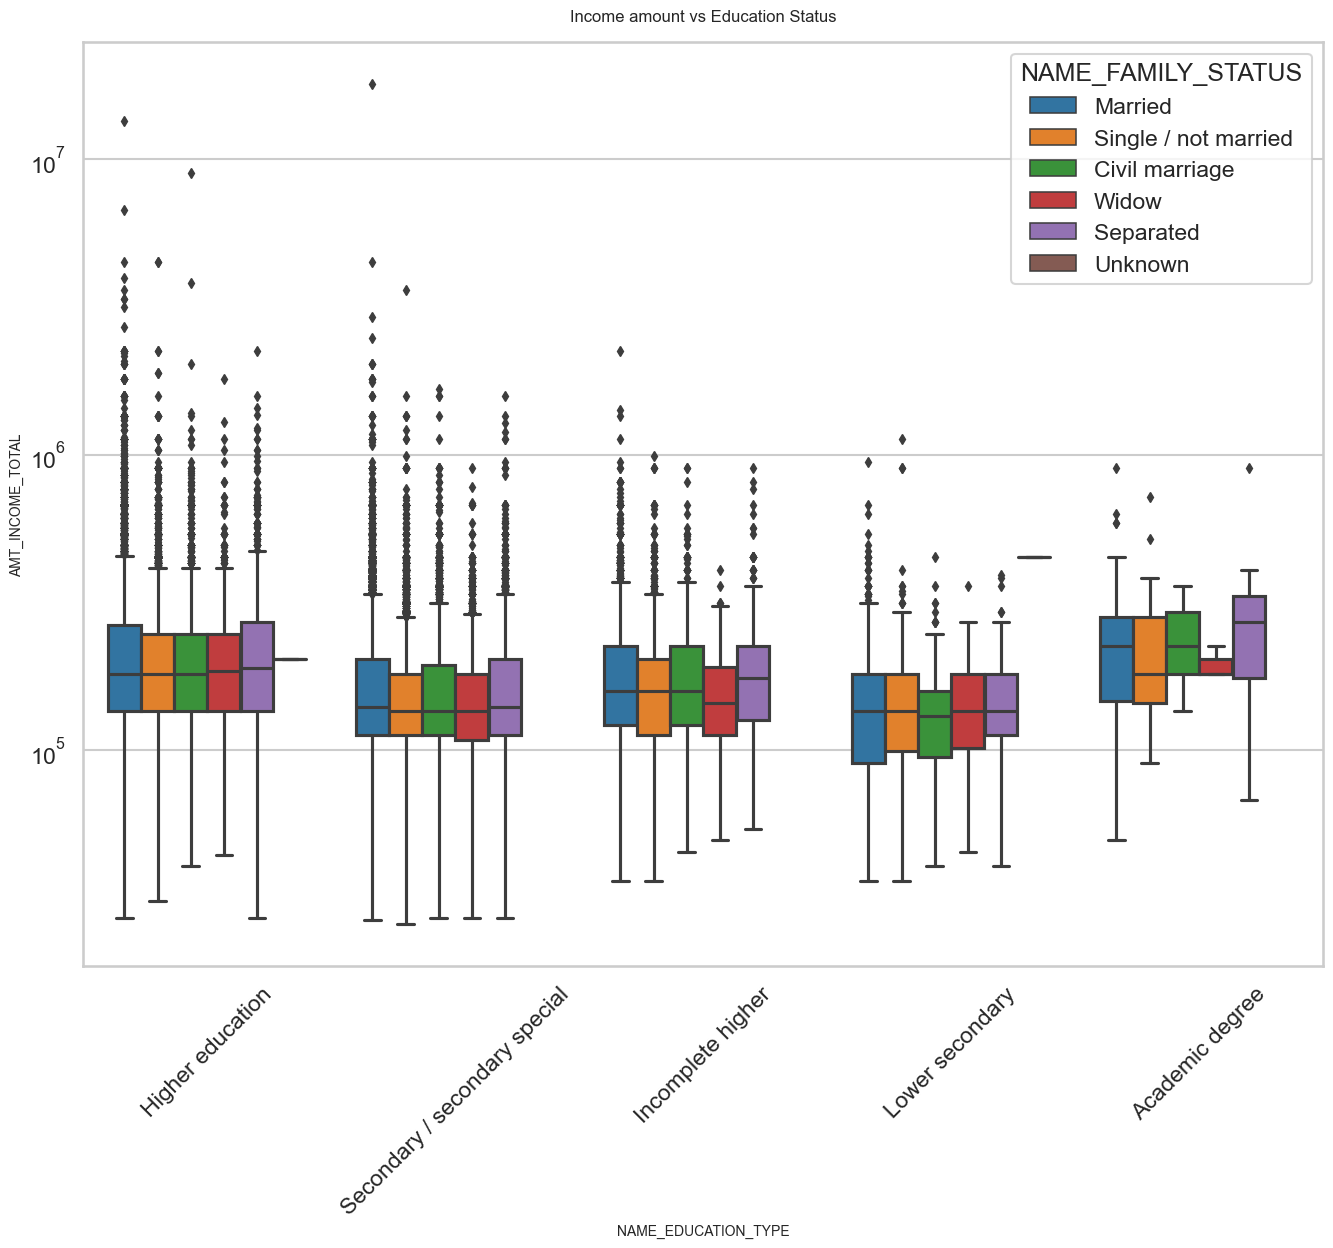

In [164]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Echoing certain resemblances with Target0,

In the provided box plot, when considering 'Higher education', the income amounts often align closely with various family statuses. 'Academic degree', while exhibiting fewer outliers, displays slightly elevated income levels compared to 'Higher education'.

When examining 'Lower secondary', it becomes evident that income amounts in this category are relatively lower in comparison to other situations.






In [165]:
# Reading the dataset of previous application

df1=pd.read_csv('previous_application.csv')
df1.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [166]:

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [167]:
# Removing columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [168]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)



In [169]:
df1.shape

(69635, 22)

In [170]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

/var/folders/9v/r57g88ws1qs3dj169qc7g4k80000gn/T/ipykernel_12641/207405783.py:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')


In [171]:
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            N   
1      100035       0          Cash loans           F            N   
2      100039       0          Cash loans           M            Y   
3      100046       0     Revolving loans           M            Y   
4      100046       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY  \
0               Y             0           90000.0     180000.0       9000.0   
1               Y             0          292500.0     665892.0      24592.5   
2               N             1          360000.0     733315.5      39069.0   
3               Y             0          180000.0     540000.0      27000.0   
4               Y             0          180000.0     540000.0      27000.0   

   ...      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  ...  Cash through the bank                XAP              New   
1  ...  Cash through the bank                 HC         Repeater   
2  ...  Cash through the bank                XAP        Refreshed   
3  ...  Cash through the bank                XAP              New   
4  ...  Cash through the bank              LIMIT         Repeater   

  NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0                 XNA            Cash            walk-in   
1                 XNA            Cash            walk-in   
2                 XNA            Cash            walk-in   
3                 XNA            Cash            walk-in   
4                 XNA            Cash            walk-in   

                 CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0     Credit and cash offices                -1                   XNA   
1     Credit and cash offices                -1                   XNA   
2  Channel of corporate sales                -1                   XNA   
3     Credit and cash offices                -1                   XNA   
4     Credit and cash offices                -1                   XNA   

  NAME_YIELD_GROUP  
0             high  
1       low_action  
2       low_normal  
3       low_normal  
4       low_normal  

[5 rows x 51 columns]

In [173]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [174]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Performing univariate analysis**

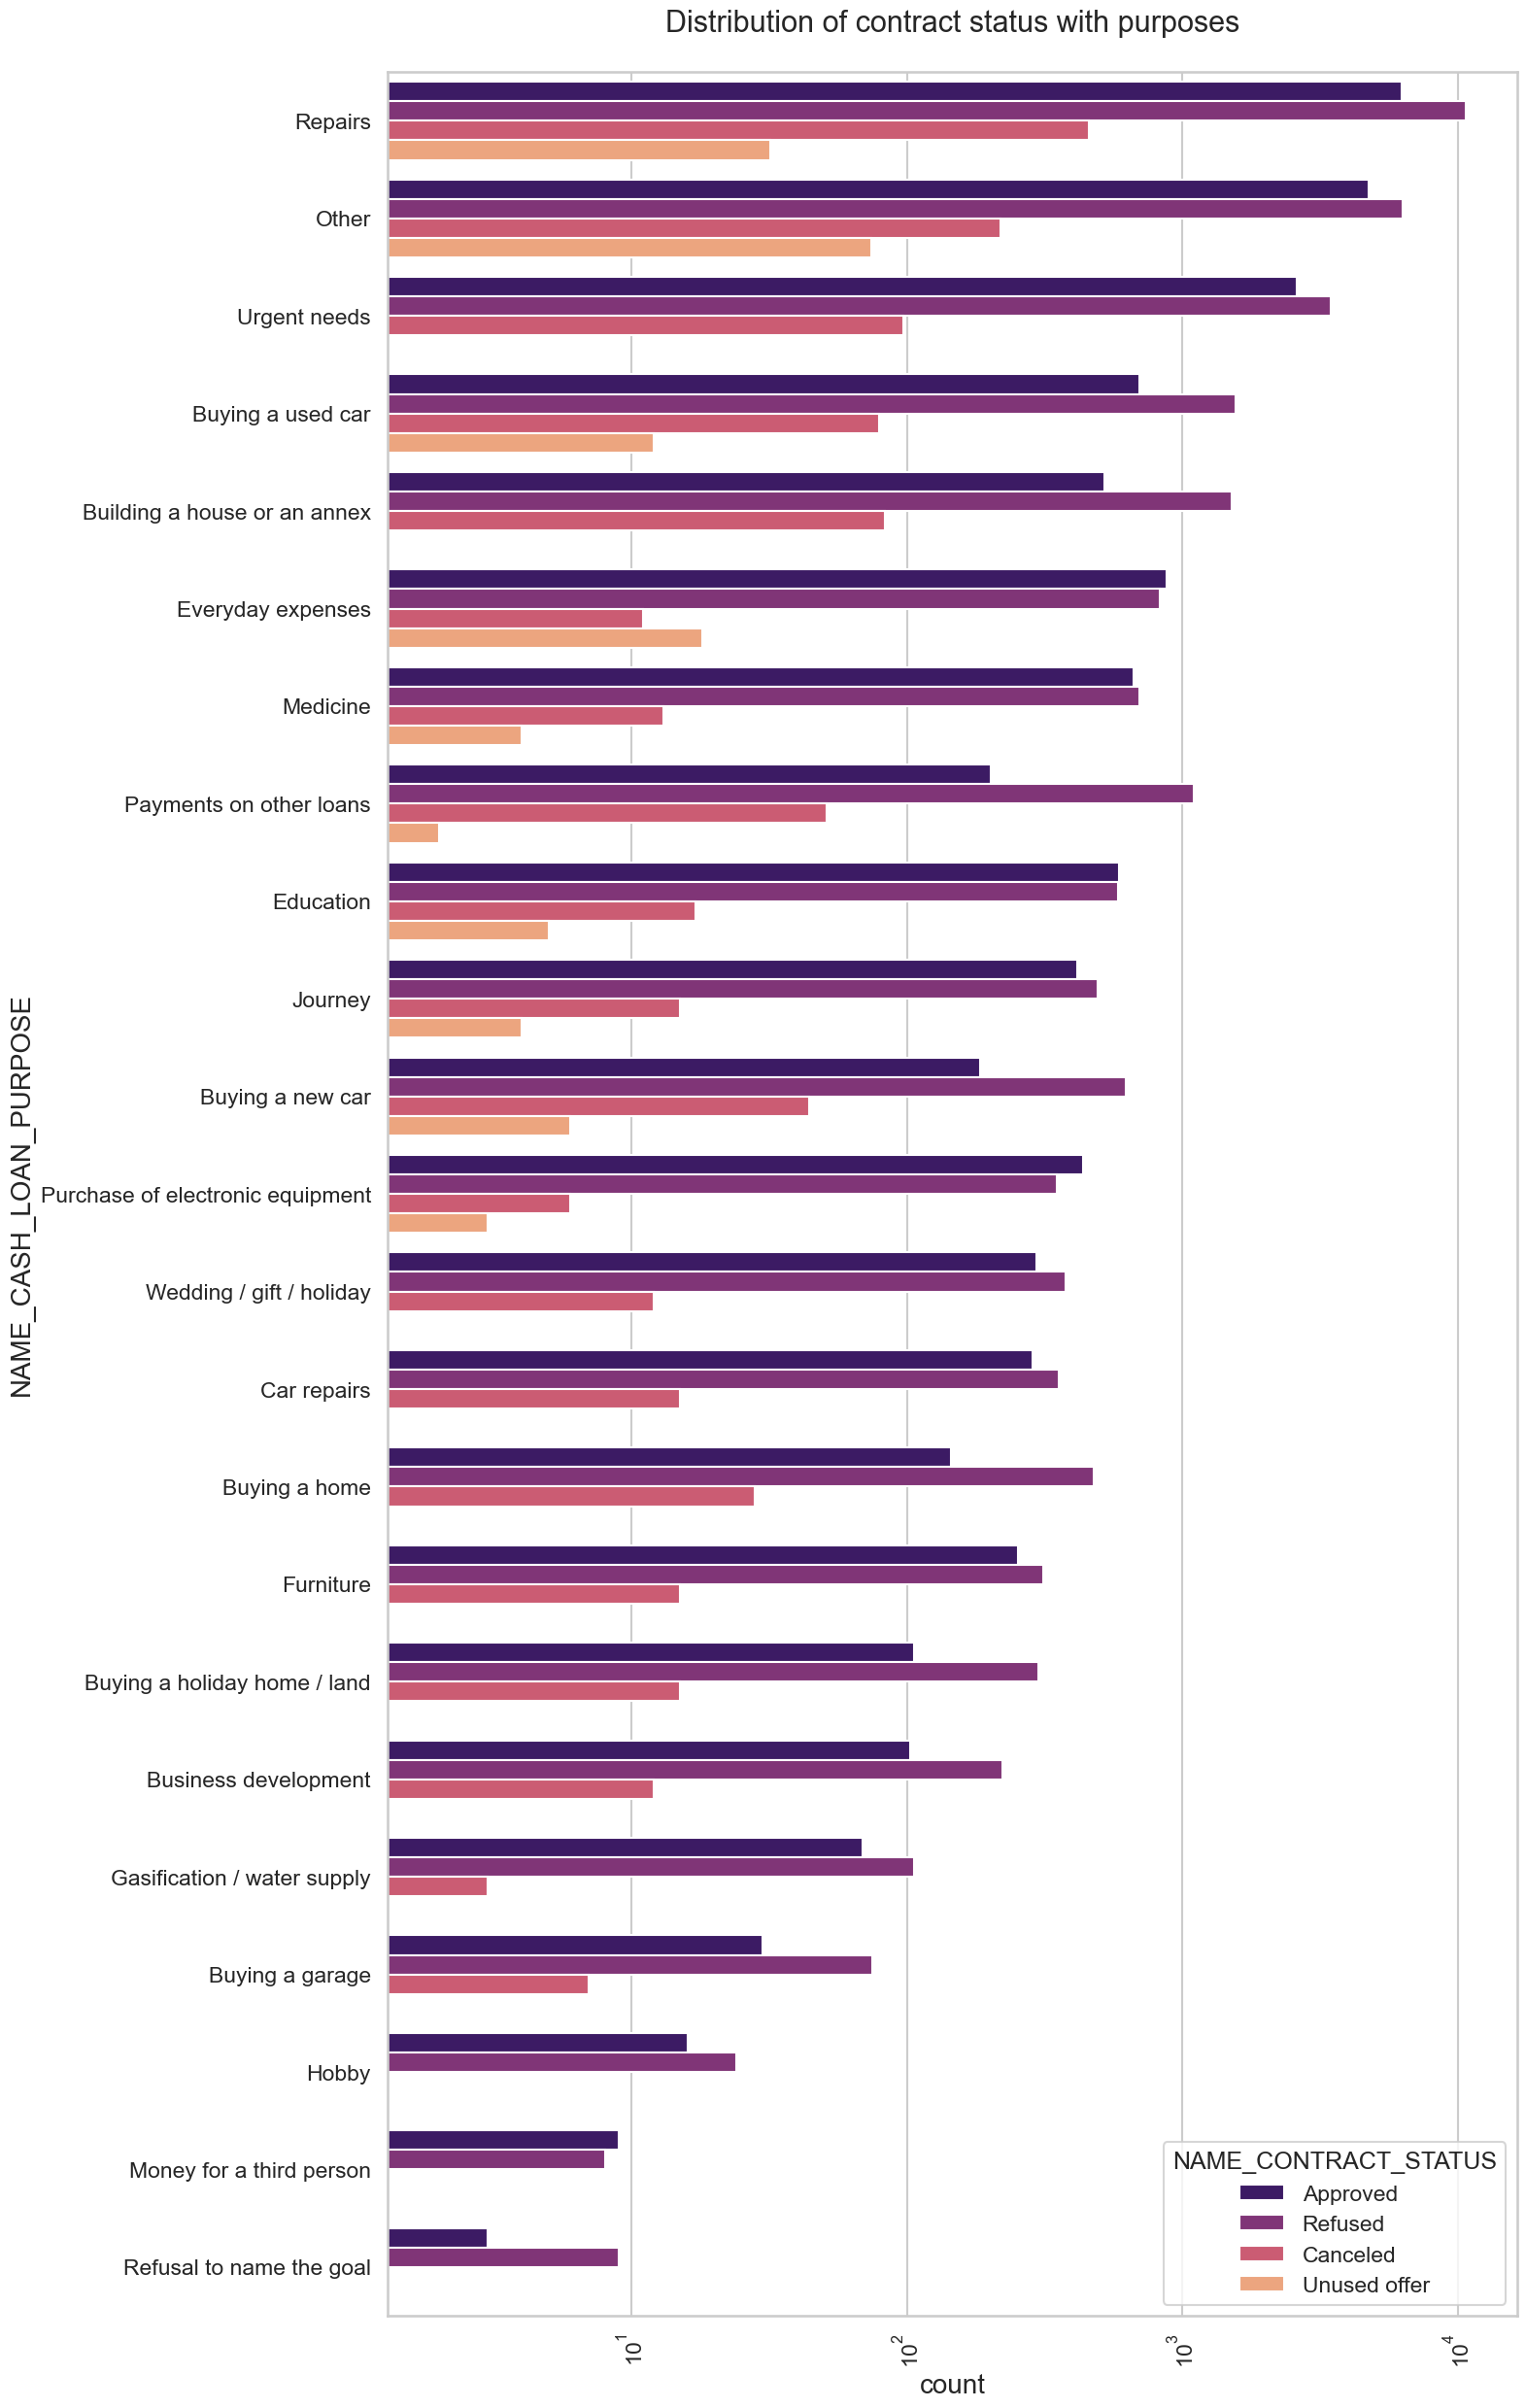

In [175]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Key observations derived from the presented plot:

- 'Repairs' emerge as the primary reason for loan rejections.
- Educational purposes yield an equilibrium between loan approvals and rejections.
- Notably, loan rejections significantly outweigh approvals for purposes involving 'Paying other loans' and 'Buying a new car'.





In [176]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

Observations

- Borrowers who utilize loans for 'Repairs' encounter greater challenges in making timely payments.
- Notably, specific loan purposes exhibit a notably higher propensity for successful repayments. These purposes include 'Buying a garage,' 'Business development,' 'Buying land,' 'Buying a new car,' and 'Education.' Thus, these purposes merit focused attention due to their association with minimal payment difficulties.

#### Bivariate Analysis

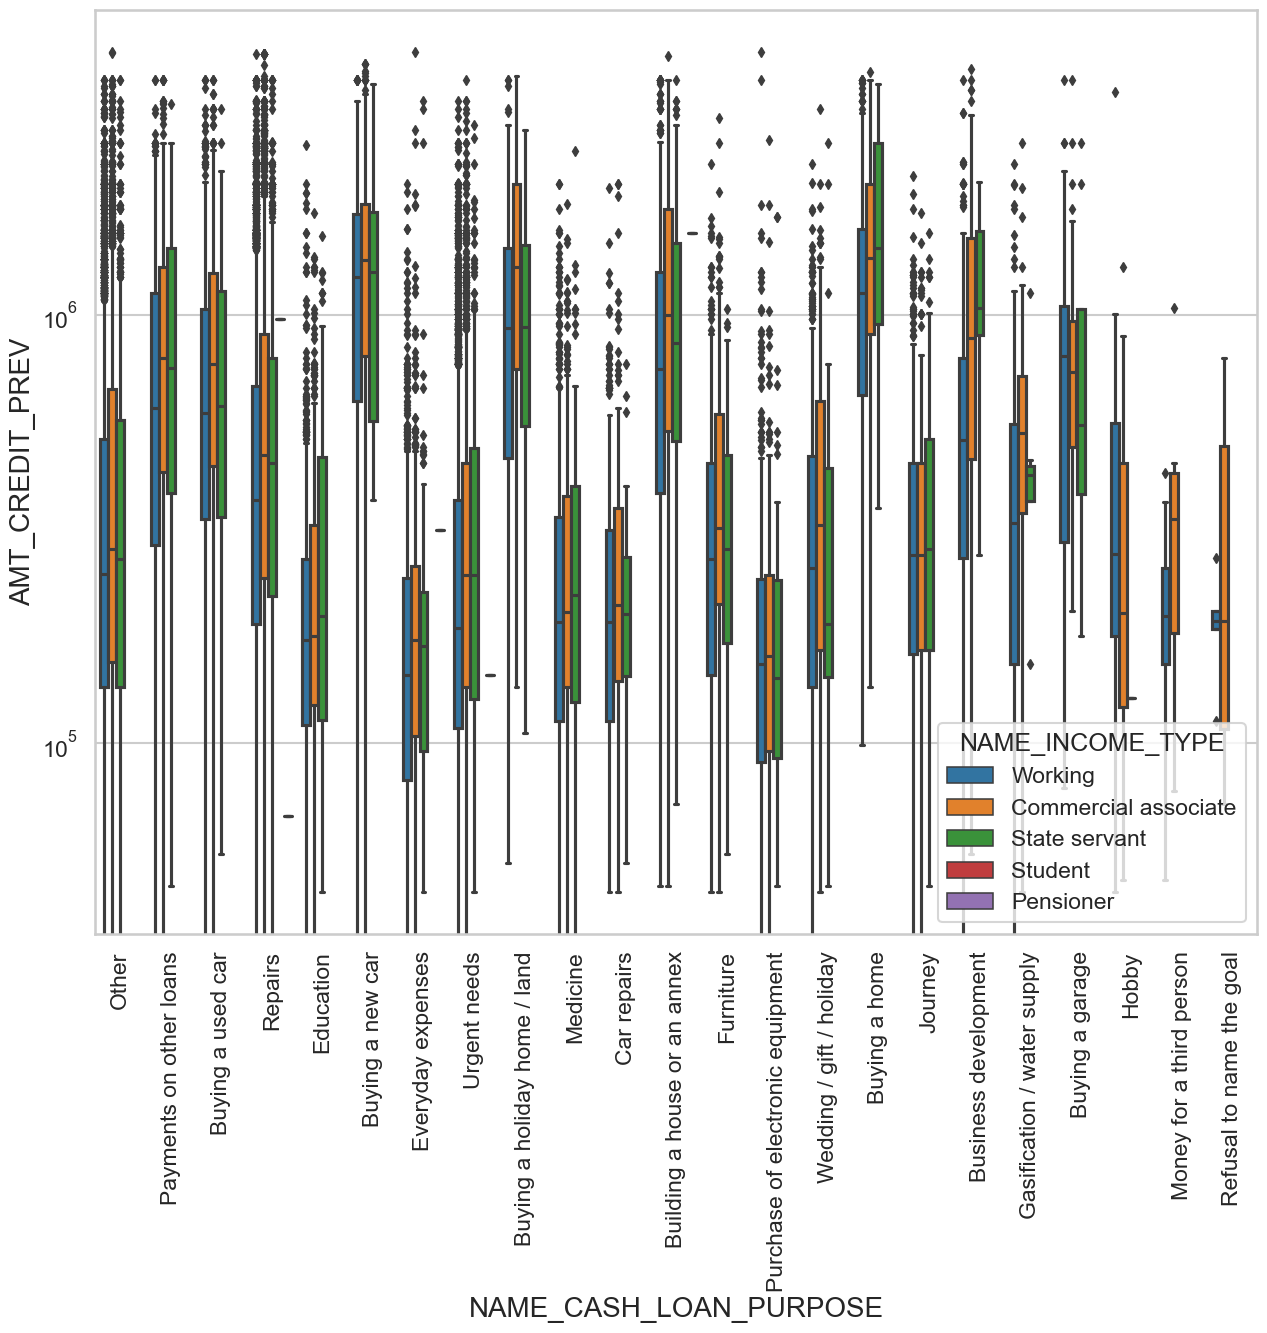

In [184]:
# Box Plotting for credit amount

plt.figure(figsize=(15,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data= new_df1, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v')
plt.show()

- Loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' are associated with higher credit amounts.

- Applicants classified as state servants exhibit a noteworthy demand for credit.

- There is a relatively lower propensity for credit applications related to third-party funding or hobbies.

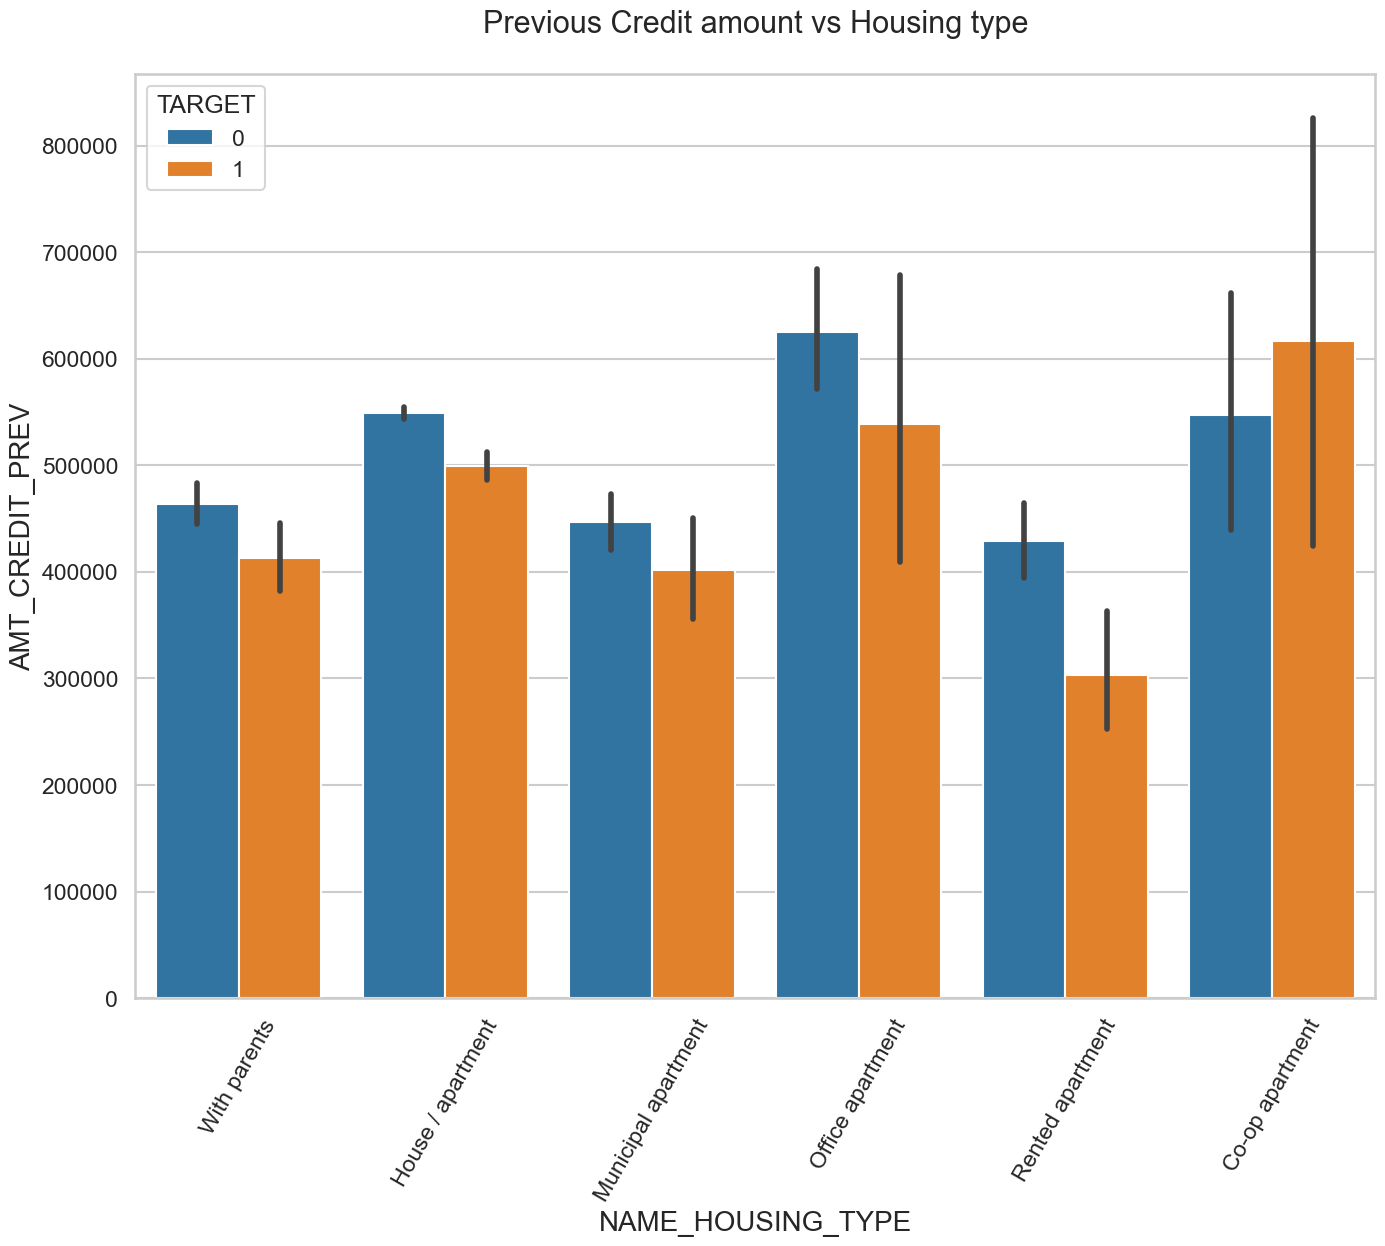

In [187]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=60)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Previous Credit amount vs Housing type')
plt.show()

Based on the data, a discernible pattern emerges: 'Office apartment' housing type displays an elevated occurrence of credit target 0, while 'Co-op apartment' housing type is noticeably associated with credit target 1.

Consequently, a prudent course of action for the bank would be to exercise caution when extending loans to the 'Co-op apartment' housing type, given their apparent challenges in meeting payment obligations. On the other hand, greater emphasis can be placed on extending loans to housing types like 'Parents' house,' 'House/apartment,' or 'Municipal apartment,' where a higher likelihood of successful payments is observed.

### Conclusion

- It is advisable for banks to prioritize individuals with contract types 'Student,' 'Pensioner,' and 'Businessman' who possess housing types other than 'Co-op apartment' for more favorable payment outcomes.

- Bank attention should be moderated when dealing with clients under the income type 'Working,' as this category exhibits a higher incidence of payment difficulties.

- Notably, loans intended for the purpose of 'Repair' show a higher frequency of untimely payment issues.

- Targeting clients from the 'With parents' housing type could prove advantageous, given their comparatively lower occurrence of payment challenges.